# CFLP

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#CFLP" data-toc-modified-id="CFLP-1.1">CFLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### CFLP

The Capacitated Facility Location Problem (CFLP) model is a method proposed to address the issue of selecting optimal locations for distribution centers with limited capacity and scale. The basic assumptions of the CFLP model are: (1) the capacity of the distribution centers is constrained, and the specific number of distribution nodes is known; (2) the fixed costs of the distribution centers remain constant; (3) the specific number of distribution centers is determined. The CFLP model selects the minimum number of end nodes that can serve the demands of all customer points while **minimizing the sum of fixed costs and transportation costs from the nodes to the customer points**. Firstly, under the premise of minimizing the total cost, the temporary logistics supply nodes of the enterprise are calculated. Secondly, the mobile distribution nodes within the logistics supply area are computed to minimize the total cost in the enterprise logistics supply region. When the total cost of the selected logistics distribution points shows a decreasing trend, the location calculation is considered complete; otherwise, the logistics distribution point must be moved to the next location within the selection range and the calculation is repeated until the total cost is minimized.

*Parameters*:
* ***I*** : Collection of demand point locations
* ***h<sub>i</sub>*** : Number of customers at point i
* ***P*** : Total number of facilities
* ***d<sub>ij</sub>*** : Distance between point i and point j

*Decision variables*:
$$
X_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
Y_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$

###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i, j \in I} h_i d_{i j} Y_{i j} & (1)\\
\text { s.t. } & \sum_{i \in I} X_i=P, & (2)\\
& Y_{i j} \leq X_j,  \forall i, j \in I, & (3) \\
& \sum_{j \in I} Y_{i j}=1,  \forall i \in I, & (4)\\
& X_i, Y_{i j} \in\{0,1\}, \forall i, j \in I.  & (5)
\end{array}

        

## Setup

In [1]:
import random
from itertools import product
import osmnx as ox
import pandas as pd

from location.FLPModel import *

## Example

### Random Data

In [2]:
np.random.seed(0) # random seed

solver_list = listSolvers(onlyAvailable=True)
print(solver_list)

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


In [3]:
num_points = 20
num_located = 4  # P: number of located facility in the end
np.random.seed(0)
num_people = np.random.randint(1, 2, size=num_points)  # h
demand = np.random.randint(1, 2, size=num_points)  #d
cost = np.random.randint(1, 2, size=num_points)  #c
capacity = np.random.randint(80, size=num_points)  #C
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(random.random(), random.random()) for i in range(num_points)]
y, selected, selected_points, unselected_points  = CFLP(num_people=num_people,
                                                demand=demand,
                                                capacity=capacity,
                                                num_points=num_points,
                                                num_located=num_located,
                                                cartesian_prod=cartesian_prod,
                                                cost=cost,
                                                cover=points,
                                                solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [3, 5, 7, 9]
Costs =  7.102690720856374


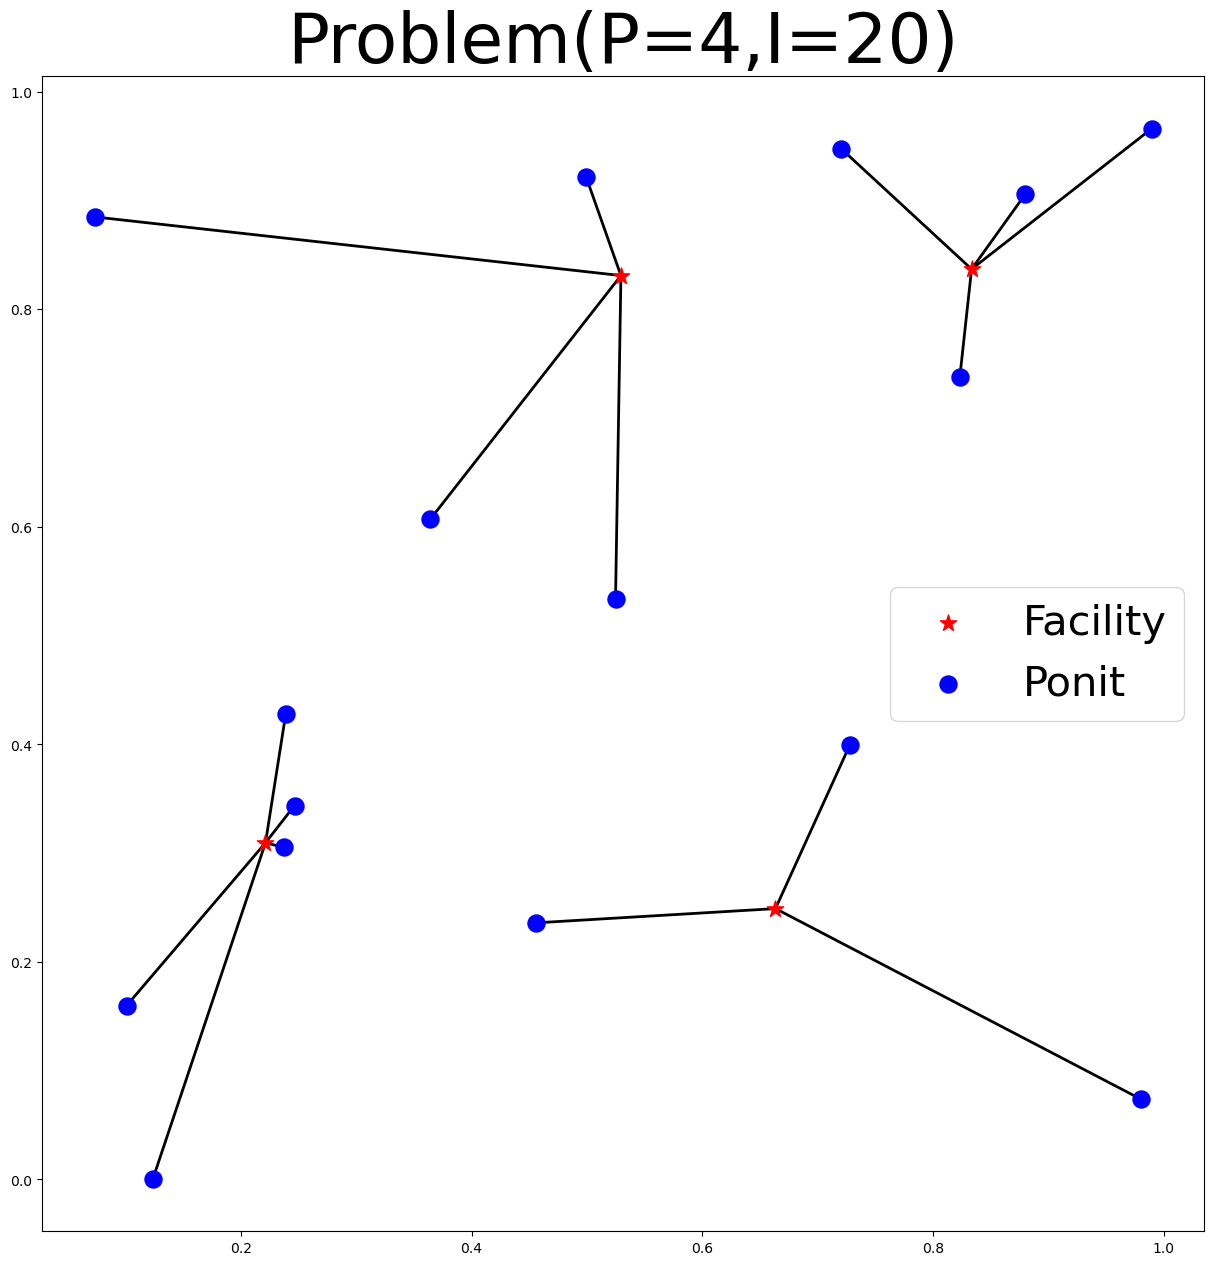

In [4]:
#Image representation
plt.figure(figsize=(15,15))
name = 'Problem(P=' + str(num_located) + ',I=' + str(num_points) + ')'
plt.title(name, fontsize = 50)
#Points
plt.scatter(*zip(*selected_points), c='Red', marker='*',s=150,label = 'Facility',zorder=2)   
plt.scatter(*zip(*unselected_points), c='Blue', marker='o',s=150, label = 'Ponit', zorder=3)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue > 0 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='Black', linewidth=2, zorder=1)

# plt.grid(True)   
plt.legend(loc='best', fontsize = 30) 
plt.show()

### Road Network Data

In [5]:
df = pd.read_csv('../data/北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
demand = np.random.randint(1,5, size=num_points)  #d
cost = np.random.randint(1,10, size=num_points)  #c
capacity = np.random.randint(80, size=num_points)  #C
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [6]:
y, selected, selected_points, unselected_points  = CFLP(num_people=num_people,
                                                demand=demand,
                                                capacity=capacity,
                                                num_points=num_points,
                                                num_located=num_located,
                                                cartesian_prod=cartesian_prod,
                                                cost=cost,
                                                cover=points,
                                                solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [4, 8, 10, 15, 18, 39, 42, 61, 66, 98]
Costs =  13.004622095674007


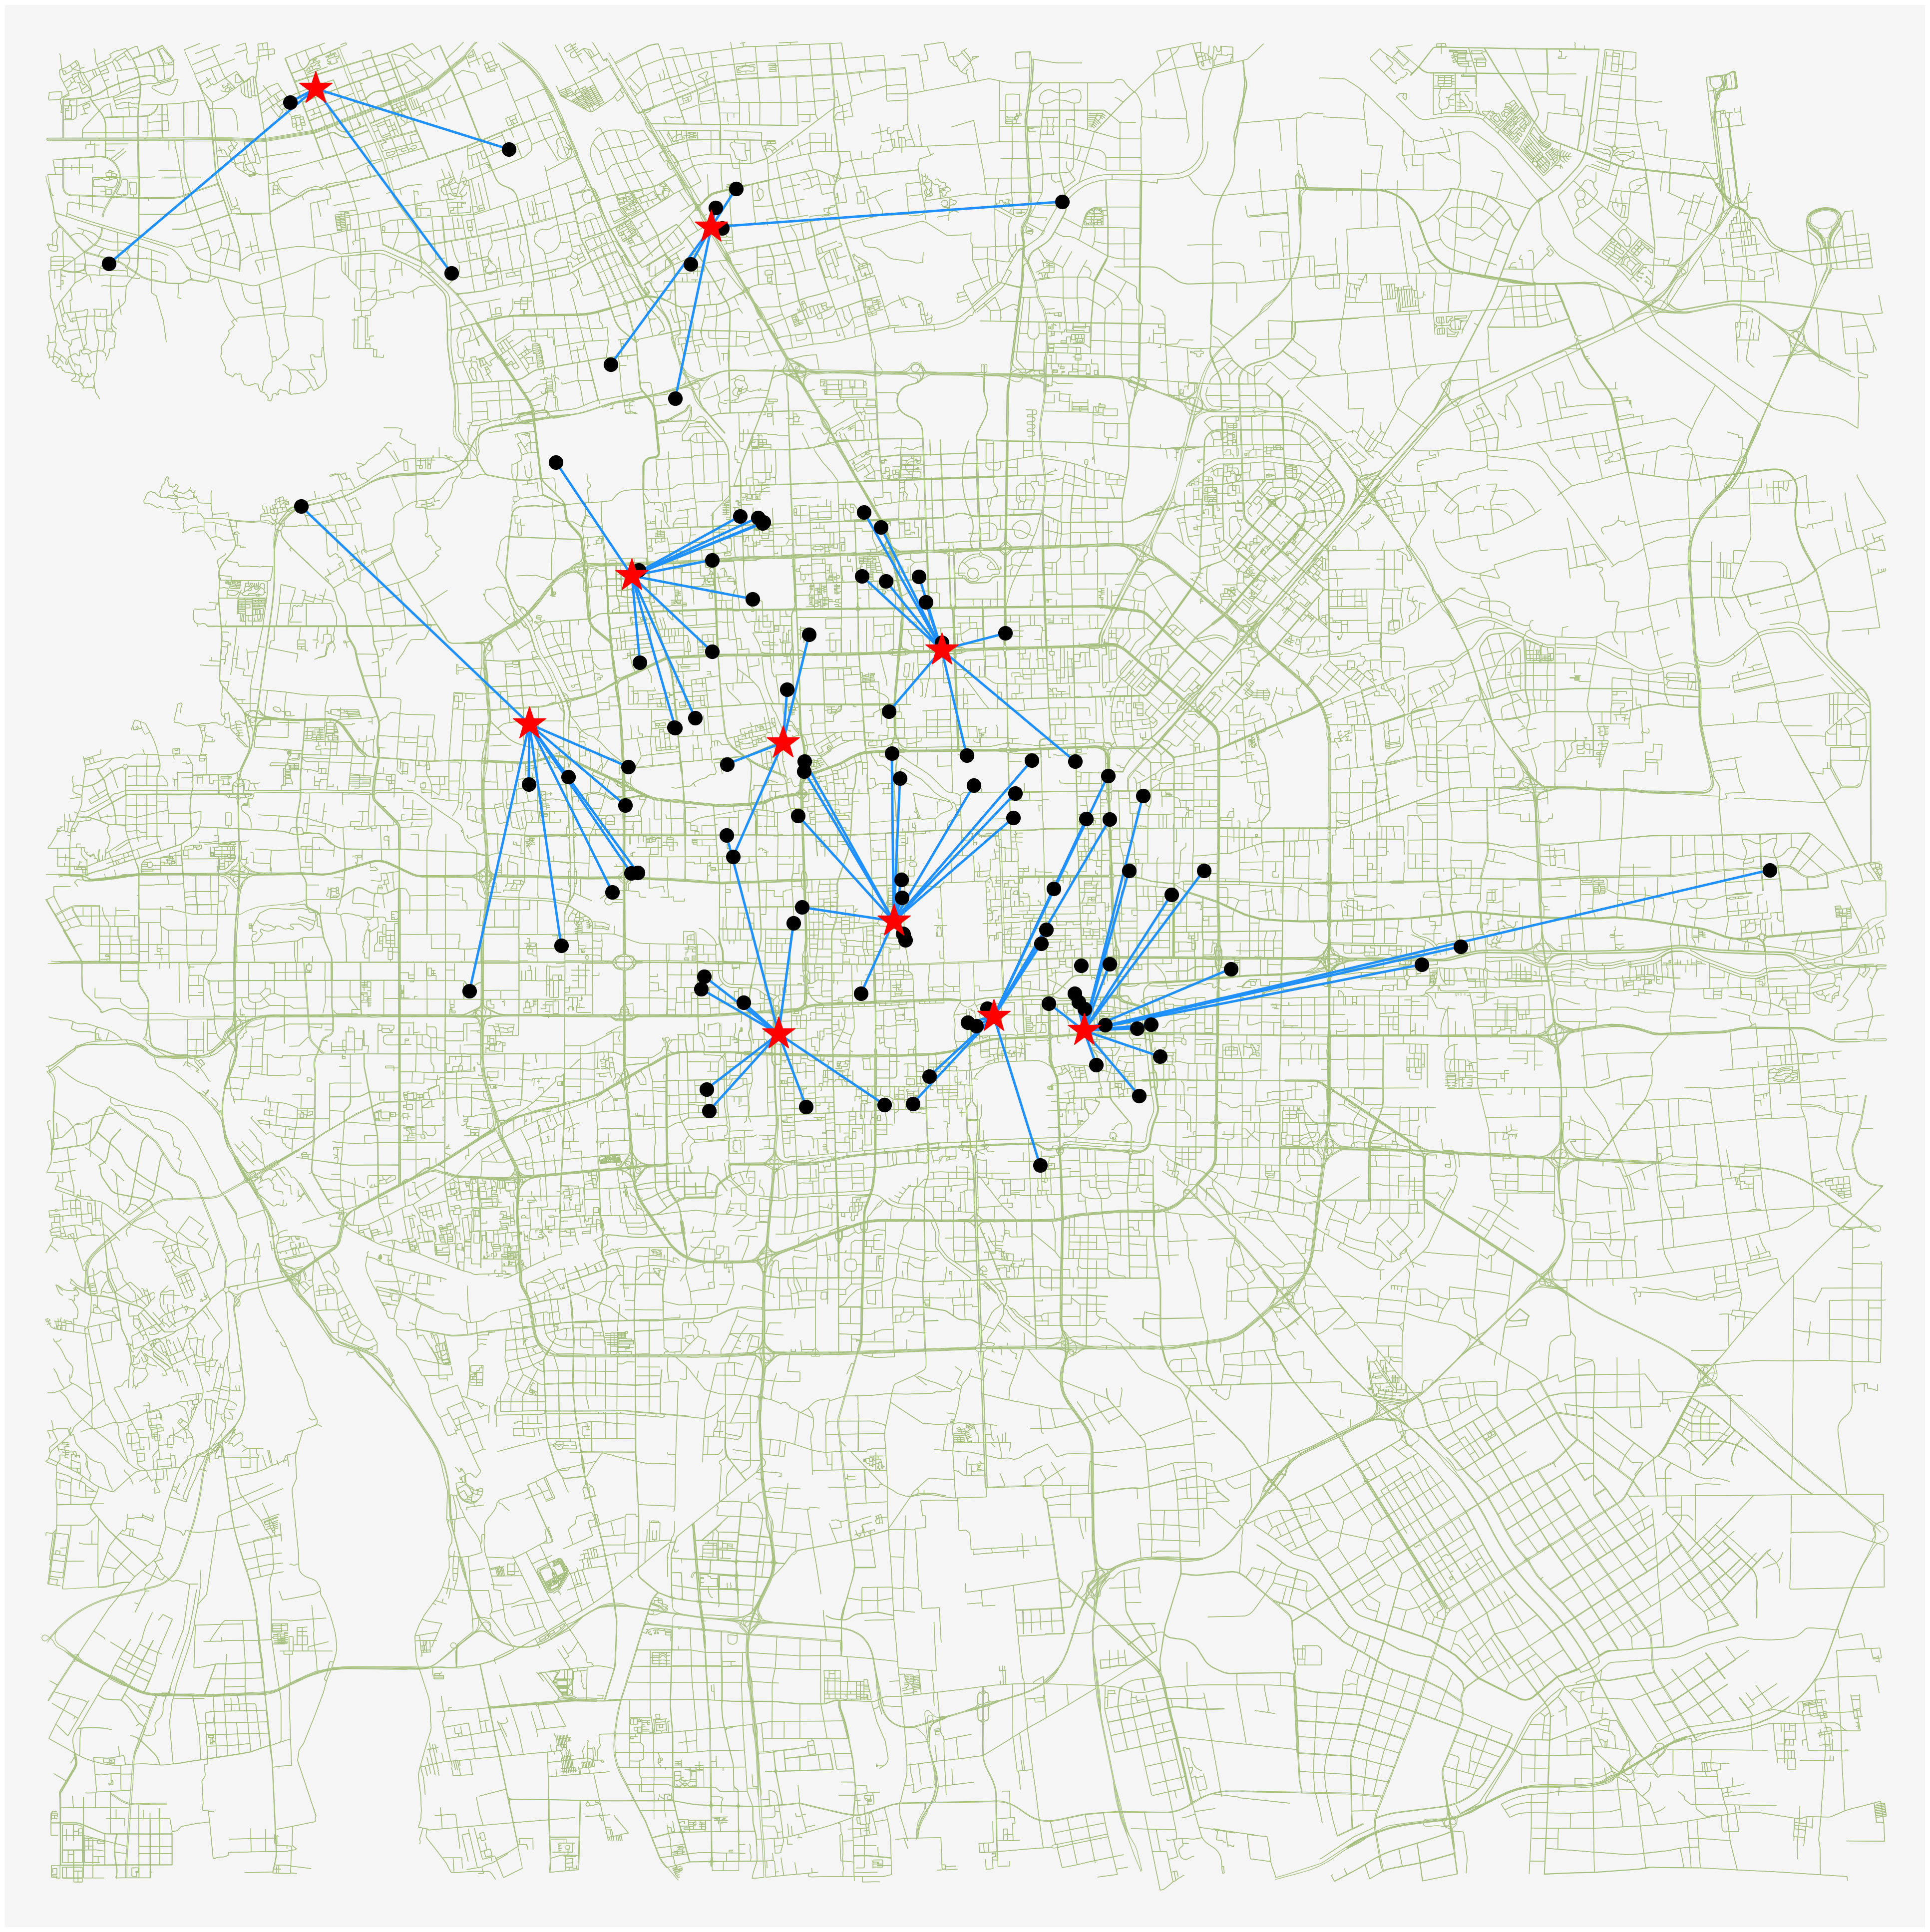

In [7]:
G = ox.load_graphml('..\data\Beijing.graphml')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='#1E90FF', linewidth=3.5, zorder=1)
